### Pandas, Matplotlib, and Basemap tutorial: Coloring States by Baby Name Uniqueness

In this tutorial we will use Matplotlib and Basemap to visualize the degree of uniqueness each state has in giving baby names. In the last tutorial we imported matplotlib.pyplot, matplotlib and numpy simply by importing pylab. However, it is easier to keep track of which modules are being used if they are imported explicitly as shown below.

In [1]:
from math import *
import csv
import pandas as pd
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

We start with a file called "namebystate" that contains a text file of baby names for each state. We will use the chdir() method in the os module to change to the directory with the names data and print out all the files with '.TXT' extensions in the directory.

In [2]:
os.chdir('/Users/yarrowmadrona/portfolio/vis/baby_names_state/namesbystate')
current_dir = os.getcwd()  
for file in os.listdir(current_dir):
    if file.endswith('.TXT'):
        print file

AK.TXT
AL.TXT
AR.TXT
AZ.TXT
CA.TXT
CO.TXT
CT.TXT
DC.TXT
DE.TXT
FL.TXT
GA.TXT
HI.TXT
IA.TXT
ID.TXT
IL.TXT
IN.TXT
KS.TXT
KY.TXT
LA.TXT
MA.TXT
MD.TXT
ME.TXT
MI.TXT
MN.TXT
MO.TXT
MS.TXT
MT.TXT
NC.TXT
ND.TXT
NE.TXT
NH.TXT
NJ.TXT
NM.TXT
NV.TXT
NY.TXT
OH.TXT
OK.TXT
OR.TXT
PA.TXT
RI.TXT
SC.TXT
SD.TXT
TN.TXT
TX.TXT
UT.TXT
VA.TXT
VT.TXT
WA.TXT
WI.TXT
WV.TXT
WY.TXT


We can then use the enumerate( ) function to see the format for each file. Enumerate returns a tuple with the first element being the index and the second number being the line. After Python version 2.5 you have the option of assigning the first number of the index. So the first line will have the index of one instead of zero

In [3]:
for lineno, line in enumerate(open('CA.TXT', 'r'), start=1):
    if lineno < 5:
        print line

CA,F,1910,Mary,295

CA,F,1910,Helen,239

CA,F,1910,Dorothy,220

CA,F,1910,Margaret,163



Each text file is a comma delimited file with the following fields; state, gender, date, name, counts. Now that we know what we are dealing with we can get started. Let's use the walk( ) function of the os module to iterate over the list of files in the directory. This is just like the Baby Names tutorial I posted earlier. We will make a list of files in the directory called "file_list".

In [4]:
file_list = []
for root, dirs, files in os.walk(current_dir):
        for filename in files:
            if filename.endswith('.TXT'):
                file_list.append(filename)
print file_list
print len(file_list)

['AK.TXT', 'AL.TXT', 'AR.TXT', 'AZ.TXT', 'CA.TXT', 'CO.TXT', 'CT.TXT', 'DC.TXT', 'DE.TXT', 'FL.TXT', 'GA.TXT', 'HI.TXT', 'IA.TXT', 'ID.TXT', 'IL.TXT', 'IN.TXT', 'KS.TXT', 'KY.TXT', 'LA.TXT', 'MA.TXT', 'MD.TXT', 'ME.TXT', 'MI.TXT', 'MN.TXT', 'MO.TXT', 'MS.TXT', 'MT.TXT', 'NC.TXT', 'ND.TXT', 'NE.TXT', 'NH.TXT', 'NJ.TXT', 'NM.TXT', 'NV.TXT', 'NY.TXT', 'OH.TXT', 'OK.TXT', 'OR.TXT', 'PA.TXT', 'RI.TXT', 'SC.TXT', 'SD.TXT', 'TN.TXT', 'TX.TXT', 'UT.TXT', 'VA.TXT', 'VT.TXT', 'WA.TXT', 'WI.TXT', 'WV.TXT', 'WY.TXT']
51


Now we have a list containing all of the .TXT files in our data directory. The length of the list is 51 corresponding to the 50 states plus the District of Columbia. 

Next let's make a Pandas data frame for California in 2013. It will have columns for name and counts for 2013. We will then apply this to all 'TXT' files. We create a file object with open( ). We initialize an empty list (name_list) outside of the loop. We will add info to this list as we go through the state files. We then use a for-loop to read each line as a string. We strip the string of new lines and spaces using the strip( ) method and convert the string to a list delimited by commas using the split( ) method of lists. The comma is the default delimiter but I like to specify it explicitly. Next, we only take the data from the females for the year of 2013 using indexing and Booleans.

Inside of the loop we make a temporary list called 'temp_list' to store the counts (temp_list.append(int(line[4]))), the name (temp_list.append(line[3])) and the state (temp_list.append(line[0])).

Finally, we can append the temp_list to the name_list to create a list of lists. Later we will want to sort our pandas data frame on births so we convert the elements in the births list from strings to integers using a list comprehension, births = [int(element) for element in births]. We then sort the lists in reverse so that they are in descending rather ascending order. By default Python sorts on the first element of each list. We then create a new "name_list_top10" which contains only the top10 names for California in 2013. 

In [5]:
name_list = []
for line in open('CA.TXT', 'r'):
    line = line.strip().split(',')
    if line[1] == 'F' and line[2] == '2013':
        temp_list = []
        temp_list.append(int(line[4]))
        temp_list.append(line[3])
        temp_list.append(line[0])
        name_list.append(temp_list)        
name_list.sort(reverse=True)
name_list_top10 = name_list[0:10]
close('CA.TXT')
print name_list_top10

[[3442, 'Sophia', 'CA'], [2776, 'Isabella', 'CA'], [2583, 'Mia', 'CA'], [2468, 'Emma', 'CA'], [2279, 'Emily', 'CA'], [2141, 'Olivia', 'CA'], [1967, 'Sofia', 'CA'], [1490, 'Camila', 'CA'], [1485, 'Abigail', 'CA'], [1396, 'Samantha', 'CA']]


Creating a Pandas data frame is very easy. We just pass the list of lists and give it the column headings.

In [6]:
name_df = pd.DataFrame(name_list_top10, columns=['births', 'name', 'state'])
print name_df

   births      name state
0    3442    Sophia    CA
1    2776  Isabella    CA
2    2583       Mia    CA
3    2468      Emma    CA
4    2279     Emily    CA
5    2141    Olivia    CA
6    1967     Sofia    CA
7    1490    Camila    CA
8    1485   Abigail    CA
9    1396  Samantha    CA


We have made a Pandas data frame from one file ('CA.txt'). We can now apply this approach to all files in the file_list we created earlier. First we initialize an empty Pandas data frame. Then we iterate through the file list and repeat what we did with the California example above. Except that we will append a new data frame for each state to the growing data frame called "df". Each Pandas data frame called "data" will be overwritten when with every new state file but that is o.k. because we are constantly adding this data to the growing data frame "df". Since we initialize it outside of the for-loop we won't overwrite it.

In [7]:
df = pd.DataFrame()
for file in file_list:
    name_list2 = []
    for line in open(file, 'r'):
        line = line.strip().split(',')
        if line[1] == 'F' and line[2] == '2013':
            temp_list2 = []
            temp_list2.append(int(line[4]))
            temp_list2.append(line[3])
            temp_list2.append(line[0])
            name_list2.append(temp_list2)
    name_list2.sort(reverse=True)
    name_list_top10 = name_list2[0:10]
    data = pd.DataFrame(name_list_top10, columns = ['Births', 'Name', 'State'])
    df = df.append(data)
print df

    Births       Name State
0       57       Emma    AK
1       49     Sophia    AK
2       39    Abigail    AK
3       38   Isabella    AK
4       35     Olivia    AK
5       34     Harper    AK
6       33      Emily    AK
7       32  Charlotte    AK
8       31        Ava    AK
9       29     Amelia    AK
0      327       Emma    AL
1      260        Ava    AL
2      213     Olivia    AL
3      189    Madison    AL
4      181   Isabella    AL
5      180     Sophia    AL
6      169  Elizabeth    AL
7      168   Brooklyn    AL
8      162      Chloe    AL
9      160     Harper    AL
0      212       Emma    AR
1      155     Olivia    AR
2      140        Ava    AR
3      128   Isabella    AR
4      127     Sophia    AR
5      122    Abigail    AR
6      107    Addison    AR
7      101    Madison    AR
8      101   Brooklyn    AR
9       98      Avery    AR
..     ...        ...   ...
0      377       Emma    WI
1      356     Olivia    WI
2      306        Ava    WI
3      297     Sophi

You might notice some similarities to appending lists and appending a Pandas data frame. But there is one important difference. Python lists can be appended in place. This means you can initialize the empty list outside of the loop and build the list by going through the loop. Pandas Data Frames cannot be appended in place. Instead you have to store the output. So if you entered:

In [8]:
df_example = pd.DataFrame()
data2 = pd.DataFrame([['A', 'B'],[1, 2]])
df_example.append(data2)

,0,1
0,A,B
1,1,2


You would be o.k. But if you entered:

In [9]:
list = [1]
df_example = pd.DataFrame()
for i in list:
    data2 = pd.DataFrame([['A', 'B'],[1,2]])
    df_example.append(data2)
print df_example

Empty DataFrame
Columns: []
Index: []


Ouch! What happened? You need to store df2 before you exit the loop.

In [10]:
list = [1]
df_example = pd.DataFrame()
for i in list:
    data2 = pd.DataFrame([['A', 'B'],[1,2]])
    df_example = df_example.append(data2)
print df_example

   0  1
0  A  B
1  1  2


Ah, much better. So if you think you can enter df.append(data) in the example earlier you will be disappointed (as I was) when you keep getting an empty data frame.

Now lets see if there are any top10 names that are unique to a particular state. First lets create a data frame of just the names using slicing. Before we dive to deeply we can use the nifty describe( ) function of Data Frames to quickly see if there are any unique names in the top ten.

In [11]:
df_name = df.ix[:,'Name']
df_name.describe()

count      510
unique      38
top       Emma
freq        51
Name: Name, dtype: object

If we had sliced the a numerical column such as 'Births' are statistics would give the max and min number of births found etc. Since we don't have numerical data we get the max number of entries in the names column which is 510 for 10 names per state (including D.C). Here we can see that there are only 38 names that are represented in the top10 across all states.

There are a lot of ways you can filter data in a data frame. I have seen the name "Brooklyn" around a lot and I would like to know which states have baby girls with this name in 2013. You can slice a column using df['name of column']. You can also filter a column using a Boolean expression.

In [12]:
col = df['Name']
print df[col == "Brooklyn"]

   Births      Name State
7     168  Brooklyn    AL
8     101  Brooklyn    AR
9     160  Brooklyn    LA
5     110  Brooklyn    MS
6      37  Brooklyn    MT
8     154  Brooklyn    UT
9      71  Brooklyn    WV


I'm not surprised that the majority of little girls named Brooklyn are in southern or mid-west states. I'm sure that New Yorkers are far too hip to name their kids after one of their own cities. 

We know from the describe( ) method function above that there are only 38 names in the Top10 across all states. We can use the value_count() method to quickly determine how many states have each name in their top10.

In [13]:
name_state_counts = df['Name'].value_counts()
print name_state_counts

Emma         51
Olivia       51
Ava          49
Sophia       49
Isabella     46
Abigail      37
Emily        30
Madison      23
Charlotte    23
Avery        20
Harper       18
Mia          17
Elizabeth    12
Addison      12
Sofia         9
Chloe         8
Amelia        8
Brooklyn      7
Ella          7
Evelyn        7
Aubrey        4
Lillian       4
Paisley       2
Grace         2
Zoe           1
Eleanor       1
Aria          1
Lucy          1
Lily          1
Serenity      1
Alexis        1
Camila        1
Genesis       1
Nevaeh        1
Zoey          1
Taylor        1
Samantha      1
Victoria      1
dtype: int64


So Emma and Olivia are rock stars. As we saw previously in the Baby Names Tutorial, Emma is one of the most common female names of all time. We can now use the map( ) method to add a column containing the total number of states that have a particular name in the top10. The map method takes a dictionary so we will convert our state count series to a dictionary using the to_dict( ) method.

In [14]:
freq_to_name = name_state_counts.to_dict()
print freq_to_name

{'Zoe': 1, 'Mia': 17, 'Aria': 1, 'Abigail': 37, 'Lily': 1, 'Genesis': 1, 'Addison': 12, 'Paisley': 2, 'Elizabeth': 12, 'Aubrey': 4, 'Nevaeh': 1, 'Avery': 20, 'Samantha': 1, 'Ella': 7, 'Camila': 1, 'Victoria': 1, 'Harper': 18, 'Brooklyn': 7, 'Olivia': 51, 'Amelia': 8, 'Grace': 2, 'Isabella': 46, 'Emma': 51, 'Lillian': 4, 'Lucy': 1, 'Alexis': 1, 'Eleanor': 1, 'Serenity': 1, 'Sophia': 49, 'Charlotte': 23, 'Madison': 23, 'Taylor': 1, 'Chloe': 8, 'Evelyn': 7, 'Sofia': 9, 'Zoey': 1, 'Ava': 49, 'Emily': 30}


Now we will use  map( ) which allows you to do a transformation from values in an array, Series or DataFrame column. We will call this new column 'name_freq' for name frequency.

In [16]:
df['name_freq'] = df['Name'].map(freq_to_name)
df

,Births,Name,State,name_freq
0,57,Emma,AK,51
1,49,Sophia,AK,49
2,39,Abigail,AK,37
3,38,Isabella,AK,46
4,35,Olivia,AK,51
5,34,Harper,AK,18
6,33,Emily,AK,30
7,32,Charlotte,AK,23
8,31,Ava,AK,49
9,29,Amelia,AK,8


It is also easy to create a new data frame by pivoting our data using the crosstab( ) function.

In [17]:
data = pd.crosstab([df.State, df.Name], df.name_freq)
data

name_freq        1   2   4   7   8   9   12  17  18  20  23  30  37  46  49  \
State Name                                                                    
AK    Abigail     0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
      Amelia      0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
      Ava         0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
      Charlotte   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
      Emily       0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
      Emma        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
      Harper      0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
      Isabella    0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   
      Olivia      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
      Sophia      0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
AL    Ava         0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
      Brooklyn    0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
      Chloe       0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
      Elizabeth   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
      Emma        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
      Harper      0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
      Isabella    0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   
      Madison     0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
      Olivia      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
      Sophia      0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
AR    Abigail     0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
      Addison     0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
      Ava         0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
      Avery       0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   
      Brooklyn    0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
      Emma        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
      Isabella    0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   
      Madison     0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
      Olivia      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
      Sophia      0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
...              ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
WI    Ava         0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
      Charlotte   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
      Ella        0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
      Emily       0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
      Emma        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
      Evelyn      0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
      Harper      0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
      Isabella    0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   
      Olivia      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
      Sophia      0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
WV    Abigail     0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
      Addison     0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
      Ava         0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
      Brooklyn    0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
      Emma        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
      Isabella    0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   
      Lillian     0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
      Madison     0   0   0   0   0   0   0   0   

Now we have created a data frame where the index is the state. Having a duplicate index is allowed but can make namy other data manipulations more difficult.

I'm less interested in the particular names as I am in the frequency of novel names in each state. So I will reset the index followed by the groupby( ) function to group the states and sum the frequency of each name. If you try this without reseting the index you will get an error because you need a unique index for each color to do this.

In [18]:
data_state = data.reset_index().groupby('State').sum()
data_state

name_freq,1,2,4,7,8,9,12,17,18,20,23,30,37,46,49,51
State,,,,,,,,,,,,,,,,
AK,0,0,0,0,1,0,0,0,1,0,1,1,1,1,2,2
AL,0,0,0,1,1,0,1,0,1,0,1,0,0,1,2,2
AR,0,0,0,1,0,0,1,0,0,1,1,0,1,1,2,2
AZ,0,0,0,0,0,1,0,1,0,0,1,1,1,1,2,2
CA,2,0,0,0,0,1,0,1,0,0,0,1,1,1,1,2
CO,0,0,0,1,0,0,0,1,0,1,0,1,1,1,2,2
CT,0,0,0,0,0,0,0,1,0,0,2,1,1,1,2,2
DC,3,0,0,0,1,1,0,1,0,0,1,1,0,0,0,2
DE,0,0,1,0,0,0,0,0,0,0,2,1,1,1,2,2


This is great but now I want a way to rank each state for name uniqueness. I can create a new data series consisting of the sum of all name frequencies for each state. States with a lower score are more unique than states with a higher score.

In [19]:
df_sum = df.groupby('State').name_freq.sum()
df_sum

State
AK    362
AL    314
AR    345
AZ    362
CA    292
CO    357
CT    376
DC    192
DE    363
FL    362
GA    356
HI    296
IA    315
ID    344
IL    347
IN    329
KS    356
KY    346
LA    308
MA    373
MD    371
ME    339
MI    357
MN    322
MO    342
MS    252
MT    274
NC    360
ND    340
NE    349
NH    358
NJ    362
NM    332
NV    362
NY    362
OH    337
OK    363
OR    348
PA    357
RI    373
SC    366
SD    294
TN    366
TX    340
UT    300
VA    371
VT    278
WA    360
WI    331
WV    329
WY    268
Name: name_freq, dtype: int64

There are some nice built in Pandas functions that allow us to calculate some common statistics. For example we can compute the mean, max and min of our name frequencies:

In [20]:
df_sum.mean(), df_sum.max(), df_sum.min()

(336.43137254901961, 376, 192)

Now I would like to normalize these values to a 0-1 scale and sort the new data frame from highest to lowest. We will use this later.

In [21]:
unique_score =  1-((df_sum - df_sum.min()) / (df_sum.max() - df_sum.min()))
unique_score

State
AK    0.076087
AL    0.336957
AR    0.168478
AZ    0.076087
CA    0.456522
CO    0.103261
CT    0.000000
DC    1.000000
DE    0.070652
FL    0.076087
GA    0.108696
HI    0.434783
IA    0.331522
ID    0.173913
IL    0.157609
IN    0.255435
KS    0.108696
KY    0.163043
LA    0.369565
MA    0.016304
MD    0.027174
ME    0.201087
MI    0.103261
MN    0.293478
MO    0.184783
MS    0.673913
MT    0.554348
NC    0.086957
ND    0.195652
NE    0.146739
NH    0.097826
NJ    0.076087
NM    0.239130
NV    0.076087
NY    0.076087
OH    0.211957
OK    0.070652
OR    0.152174
PA    0.103261
RI    0.016304
SC    0.054348
SD    0.445652
TN    0.054348
TX    0.195652
UT    0.413043
VA    0.027174
VT    0.532609
WA    0.086957
WI    0.244565
WV    0.255435
WY    0.586957
Name: name_freq, dtype: float64

Now we can Concatenate our "data_state" data frame and our new "unique_score" data series using the   concat( ) function. The index values are our states. We can sort the states by the name_frequency value.

In [22]:
data_updated = pd.concat([data_state, unique_score], axis=1).sort_index(by='name_freq', ascending=False)
data_updated

name_freq,1,2,4,7,8,9,12,17,18,20,23,30,37,46,49,51,name_freq
State,,,,,,,,,,,,,,,,,
DC,3,0,0,0,1,1,0,1,0,0,1,1,0,0,0,2,1.000000
MS,1,0,1,1,1,0,1,0,0,0,1,0,0,1,1,2,0.673913
WY,0,1,1,2,0,0,0,0,1,0,0,1,0,0,2,2,0.586957
MT,0,1,0,1,0,0,2,0,1,0,1,0,0,0,2,2,0.554348
VT,0,0,0,1,2,0,1,0,0,1,1,0,0,0,2,2,0.532609
CA,2,0,0,0,0,1,0,1,0,0,0,1,1,1,1,2,0.456522
SD,1,1,0,1,0,0,0,0,1,1,0,0,0,1,2,2,0.445652
HI,2,0,0,0,1,0,0,1,0,0,1,0,0,1,2,2,0.434783
UT,1,0,0,1,0,0,1,0,0,1,1,0,1,0,2,2,0.413043


In [23]:
col = df['State']
df[col=='DC']

,Births,Name,State,name_freq
0,53,Charlotte,DC,23
1,48,Sofia,DC,9
2,41,Olivia,DC,51
3,40,Genesis,DC,1
4,37,Emma,DC,51
5,35,Zoe,DC,1
6,34,Mia,DC,17
7,34,Emily,DC,30
8,34,Amelia,DC,8
9,33,Eleanor,DC,1


In 2013 there were 40 births in Washington DC for Genesis making it a top 10 name. No other state had Genesis in the Top10. For historic reasons (I'm guessing), Eleanor is also a popular unique name to Washington DC.

It is a good idea to change the column name of the last column as it has the same name as our rows.

In [24]:
data_updated = data_updated.rename(columns={'name_freq':'unique score' })
data_updated

name_freq,1,2,4,7,8,9,12,17,18,20,23,30,37,46,49,51,unique score
State,,,,,,,,,,,,,,,,,
DC,3,0,0,0,1,1,0,1,0,0,1,1,0,0,0,2,1.000000
MS,1,0,1,1,1,0,1,0,0,0,1,0,0,1,1,2,0.673913
WY,0,1,1,2,0,0,0,0,1,0,0,1,0,0,2,2,0.586957
MT,0,1,0,1,0,0,2,0,1,0,1,0,0,0,2,2,0.554348
VT,0,0,0,1,2,0,1,0,0,1,1,0,0,0,2,2,0.532609
CA,2,0,0,0,0,1,0,1,0,0,0,1,1,1,1,2,0.456522
SD,1,1,0,1,0,0,0,0,1,1,0,0,0,1,2,2,0.445652
HI,2,0,0,0,1,0,0,1,0,0,1,0,0,1,2,2,0.434783
UT,1,0,0,1,0,0,1,0,0,1,1,0,1,0,2,2,0.413043


Now, if we knew something about the Pythob visualization library, "Seaborn", we could go sraight from the Pandas data frame to plotting the data. But I'm going to save that for it's own tutorial and go old-style for now. This means we have to take our data and make python dictionaries for input into Basemap. Making a from a Pandas data series is easy. Using the to_dict() function, the index becomes the keys and the column becomes the values.

In [25]:
score_dict = unique_score.to_dict()
score_dict

{'AK': 0.076086956521739135,
 'AL': 0.33695652173913049,
 'AR': 0.16847826086956519,
 'AZ': 0.076086956521739135,
 'CA': 0.45652173913043481,
 'CO': 0.10326086956521741,
 'CT': 0.0,
 'DC': 1.0,
 'DE': 0.070652173913043459,
 'FL': 0.076086956521739135,
 'GA': 0.10869565217391308,
 'HI': 0.43478260869565222,
 'IA': 0.33152173913043481,
 'ID': 0.17391304347826086,
 'IL': 0.15760869565217395,
 'IN': 0.25543478260869568,
 'KS': 0.10869565217391308,
 'KY': 0.16304347826086951,
 'LA': 0.36956521739130432,
 'MA': 0.016304347826086918,
 'MD': 0.027173913043478271,
 'ME': 0.20108695652173914,
 'MI': 0.10326086956521741,
 'MN': 0.29347826086956519,
 'MO': 0.18478260869565222,
 'MS': 0.67391304347826086,
 'MT': 0.55434782608695654,
 'NC': 0.086956521739130488,
 'ND': 0.19565217391304346,
 'NE': 0.14673913043478259,
 'NH': 0.097826086956521729,
 'NJ': 0.076086956521739135,
 'NM': 0.23913043478260865,
 'NV': 0.076086956521739135,
 'NY': 0.076086956521739135,
 'OH': 0.21195652173913049,
 'OK': 0.0706

There is one other hicup we need to deal with. We will pass a shape file to basemap in order to draw the states. But in the shapes file the list of states are spelled out in full instead of the abbreviations you see above. So we need to make a dictionary with abbreviations as keys and score as values. First we make a list of all of the states inluding Washington D.C. Next we make a list of the state abbreviations using a list comprehension by iterating over the indices of the unqiue_score data series.

In [27]:
state_list = ['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
              'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
              'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
              'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
              'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
              'Mississippi', 'Montana', 'North Carolina', 'North Dakota',
              'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico',
              'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon',
              'Pennsylvania', 'Rhode Island', 'South Carolina',
              'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia',
              'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
              'Wyoming']

state_abbrev = [i for i in unique_score.index]
print state_abbrev

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


Now we can use the Python Zip( ) function to make a list of tuples that we can pass the dict( ) function to give us our new dictionary.

In [28]:
combine = zip(state_abbrev, state_list)
state_abbrev_dict = dict(combine)
print state_abbrev_dict

{'WA': 'Washington', 'DE': 'Delaware', 'DC': 'District of Columbia', 'WI': 'Wisconsin', 'WV': 'West Virginia', 'HI': 'Hawaii', 'FL': 'Florida', 'WY': 'Wyoming', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'TX': 'Texas', 'LA': 'Louisiana', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska', 'TN': 'Tennessee', 'NY': 'New York', 'PA': 'Pennsylvania', 'CA': 'California', 'NV': 'Nevada', 'VA': 'Virginia', 'CO': 'Colorado', 'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'VT': 'Vermont', 'IL': 'Illinois', 'GA': 'Georgia', 'IN': 'Indiana', 'IA': 'Iowa', 'OK': 'Oklahoma', 'AZ': 'Arizona', 'ID': 'Idaho', 'CT': 'Connecticut', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'OH': 'Ohio', 'UT': 'Utah', 'MO': 'Missouri', 'MN': 'Minnesota', 'MI': 'Michigan', 'RI': 'Rhode Island', 'KS': 'Kansas', 'MT': 'Montana', 'MS': 'Mississippi', 'SC': 'South Carolina', 'KY': 'Kentucky', 'OR': 'Oregon', 'SD': 'South Dakota'}


We will create a new dictionary for Basemap with the spelled out states as keys and the scores as values. We first initialize an empty dictionary. Then we use the items( ) method of dictionaries to iterate over the keys and values in our score_dict we made above. If the key matches the key in our state_abbrev_dict (The state abbreviations are the same) we use the value for that paticular key (state name spelled out) as the new key for new_dict. The value for score_dict() (the score for that state) is then assigned as the value new_dict.

In [29]:
new_dict = {}
for key, value in score_dict.items():
    if key in state_abbrev_dict:
        new_dict[state_abbrev_dict[key]] = value

print new_dict
print new_dict.get('Mississippi')
print score_dict.get('MS')

{'Mississippi': 0.67391304347826086, 'Oklahoma': 0.070652173913043459, 'Wyoming': 0.58695652173913038, 'Minnesota': 0.29347826086956519, 'Illinois': 0.15760869565217395, 'Georgia': 0.10869565217391308, 'Arkansas': 0.16847826086956519, 'New Mexico': 0.23913043478260865, 'Ohio': 0.21195652173913049, 'Indiana': 0.25543478260869568, 'Maryland': 0.027173913043478271, 'Louisiana': 0.36956521739130432, 'Texas': 0.19565217391304346, 'Arizona': 0.076086956521739135, 'Wisconsin': 0.24456521739130432, 'Michigan': 0.10326086956521741, 'Kansas': 0.10869565217391308, 'Utah': 0.41304347826086951, 'Virginia': 0.027173913043478271, 'Oregon': 0.15217391304347827, 'Connecticut': 0.0, 'District of Columbia': 1.0, 'California': 0.45652173913043481, 'Idaho': 0.17391304347826086, 'West Virginia': 0.25543478260869568, 'South Carolina': 0.054347826086956541, 'New Hampshire': 0.097826086956521729, 'Massachusetts': 0.016304347826086918, 'Vermont': 0.53260869565217384, 'Delaware': 0.070652173913043459, 'North Dak

To check our work. We can print out any score from our dictionary using the get( ) method of dictionaries. In the above example we printed out the score for Mississippi for the new_dict and the score_dict giving the same value of 0.674.

Now we are ready to pass our data into Basemap but first let us prep the maps. Please see the Introduction to Basemap tutorial for installation instructions (including installing the GEOS library, a Basemap dependancy) and more detail on how to find the coordinates yourself. Briefly, "llcrnlon" is the longitude of the lower left corner, "llcrnlat" is the latitude of the lower left hand corner, "urcnrlon" is the longitude of the upper right hand cornder and "urcrnrlat" is the latitude of the upper right hand corner for the map. The 'llc' projection works well for square maps. Finally lon_0 specifies the center longitude coordinate for the map. Finally, lat_1 and lat_2 allow you to define an oblique centerline. These coordinates were lifted from the Basemap example file, "fill_states.py" that is distributed with the Basemap package.

In [30]:
# Lambert Conformal map of lower 48 states.
map_lower_48 = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,  
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

This lets Basemap know where in the world we want to focus on. But Basemap does not know anything about the shapes of the U.S states. For this need to provide a shape file.  This is a little confusing because although it is refered to as a shape file, there are actually three files which provide the necessary information. They all have the 'st99_d00' prefix with three different extensions, .dbf, .shp and .shx. The .shp file is a binary file containing geometric data and the .dbf and .shx are supporting files. These are maintained by the ESRI at http://www.esri.com/ We can download these from the basemap github examples branch at https://github.com/matplotlib/basemap/tree/master/examples Next we can use the Basemap  readshapefile( ) function to read in these files. Do not include the extensions and make sure all three files are in the same directory.

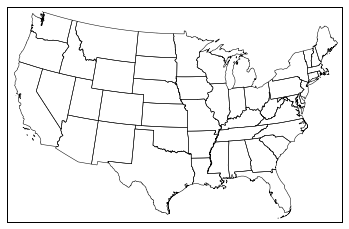

In [31]:
states_shp_info = map_lower_48.readshapefile('/Users/yarrowmadrona/portfolio/vis/baby_names_state/st99_d00', 'states',drawbounds=True)

Now we have a varriable called "shp_info" describing a map of the lower forty eight states. You can play with the longitude/lattidude coordinates and update the map to see how it changes. We will use this later.

Now let us make the Alaska and Hawaii maps

In [32]:
m_alaska = Basemap(llcrnrlon=-173,llcrnrlat=51,urcrnrlon=-134.45,urcrnrlat=71.34,
                   projection='lcc', lat_0=64, lon_0=-151)

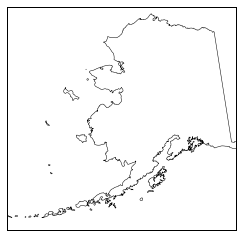

In [33]:
alaska_shp_info = m_alaska.readshapefile('/Users/yarrowmadrona/portfolio/vis/baby_names_state/st99_d00', 'states',drawbounds=True)

Hawaii has a very oblong shape so it will be hard to make a square like map. If we leave out the lower left hand and upper right hand corner longitude and latitude we can define a 'great circle' using two points. For instructions on exactly how I determined the coordinates please see the Introduction to Basemap tutorial. The coordinates for lat_0 and lon_0 describe the origin of the circle. The arc of the circle itself is described by two points, lon_1, lat_1, and lon_2, lat_2.

In [34]:
m_hawaii = Basemap(#llcrnrlon=-161,llcrnrlat=21,urcrnrlon=-154,urcrnrlat=22,
                   width=800000, height=500000,
                   projection='lcc', 
                   lat_0=20.525, lon_0=-157.385,
                   lon_1=-158.115, lat_1=17.24,
                   lon_2=-153.479, lat_2=19.663, 
                   )

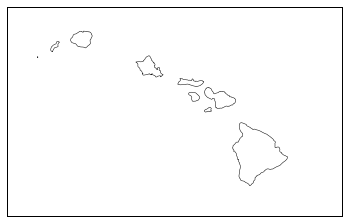

In [35]:
hawaii_shp_info = m_hawaii.readshapefile('/Users/yarrowmadrona/portfolio/vis/baby_names_state/st99_d00', 'states',drawbounds=True)

Now we are ready to color the maps. First we define the color map we are going to use with, cmap=plt.com.Blues. This will give us a blue spectrum in which dark blues will be assigned a higher uniqueness score and light blues will have a lower uniqueness score. Next we can define the maximum and minimum values for our score, vmin = 0; vmax = 1. When we read the shape file into basemap, a dictionary called "shapedict" was created and stored in 'states_shp_info'. This is where the state names and corrosponding shapes reside. for example if we pass the key "NAME" we will get back the state names as values. There are multiple entries for each state.

In [46]:
for shapedict in map_lower_48.states_info:
    print shapedict['NAME']

Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Alaska
Minnesota
Washington
Washington
Montana
Idaho
North Dakota
Washington
Washington
Washington
Washington
Washington
Washington
Washington
Washington
Michigan
Washington
Michigan
Maine
Wisconsin
Wisconsin
Wisconsin
Wisconsin
Oregon
South Dakota
Michigan
Michigan
Michigan
Wisconsin
New Hampshire
Michigan
Wisconsin
Michigan
Vermont
New York
Wyoming
Maine
Maine
Maine
Maine
Maine
Maine
Maine
Maine
Maine
Maine
Maine
Maine
Maine
Maine
Mai

We want to access shapedict using a for-loop. We initialize a new empty list called 'state_names'. These names will be filled with the names from the shapedict dictionary in the order and frequency that they appear. We want to skip "Puerto Rico" so we add; if state_name is not equal to "Puerto Rico", then the score is equal to our value of new_dict for a particular state_name key. So For every state_name entry in shapedict we get a score which is the unique score taken from new_dict. Next, we define the state_name as a key in the new colors dictionary we are creating. With, 'colors[state_name] = cmap(np.sqrt(score)' We let the key to be equal to the blues spectrum mapped onto the values for score. We use the numpy square root function to use the square root of the scores. This sepearates the valus more making it easier to see color differences.

In [57]:
cmap = plt.cm.Blues
vmin = 0; vmax = 1
colors = {}
state_names = []
for shapedict in map_lower_48.states_info:
    state_name = shapedict['NAME']
    if state_name != 'Puerto Rico':
        score = new_dict[state_name]
        colors[state_name] = cmap(np.sqrt(score))
    state_names.append(state_name)

If we print the colors dictionary we can see that we have the state names as keys and RGB blue values that are scaled to the scores for each state. And we have a list of the state_names.

In [58]:
print colors

{'Mississippi': (0.071741641882587887, 0.36931950029204874, 0.6521338154287899, 1.0), 'Oklahoma': (0.75555557012557983, 0.84993464946746822, 0.9299346446990967, 1.0), 'Wyoming': (0.11480200562406997, 0.424436759598115, 0.6951941742616542, 1.0), 'Minnesota': (0.3666436065645779, 0.64618225869010482, 0.81854672361822689, 1.0), 'Illinois': (0.58588237259902209, 0.77364092083538283, 0.87507882328594433, 1.0), 'Georgia': (0.67681662825977096, 0.81647059917449949, 0.90237601504606357, 1.0), 'Arkansas': (0.56078433113939619, 0.75986160600886621, 0.86966552103266992, 1.0), 'New Mexico': (0.43529412384126698, 0.69096503187628355, 0.8425990097662982, 1.0), 'Ohio': (0.48549020676051868, 0.71852366152931668, 0.85342561427284691, 1.0), 'Indiana': (0.41204152773408331, 0.67718571704976704, 0.83626298553803391, 1.0), 'Maryland': (0.84069205101798561, 0.90163783746607162, 0.95866205552045036, 1.0), 'Louisiana': (0.28089197768884544, 0.58762017067740946, 0.78508267332525816, 1.0), 'Idaho': (0.554509820

In [59]:
print state_names

['Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Minnesota', 'Washington', 'Washington', 'Montana', 'Idaho', 'North Dakota', 'Washington', 'Washington', 'Washington', 'Washington', 'Washington', 'Washington', 'Washington', 'Washington', 

Now we can plot the data. We can add an axis with 'ax = plt.axes()'. Like "Names" above, "nshape" and "seg" are dictionary keys in the maps_lower_48 above. We iterate over these two set the color of the shapes with "color = rgb2hex(colors[state_names[nshape]])". The values for nshape are state names. So "colors[state_names[n_shape]] will give the rgb color of th a particular state. These are then converted to hex string with the matplotlib rgb2hex( ) function. The next two lines basically tell matplotlib to render the polygons with the colors just defined. Finally we can draw the states with "map_lower_48.drawstates". We can keep the color= color and the linewidth=0 so that we don't see borders around the states. Finally we show the plot with "plt.show( )"

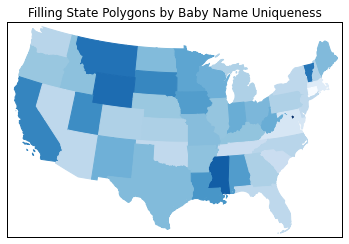

In [70]:
ax = plt.axes()
for nshape, seg in enumerate(map_lower_48.states):
    if state_names[nshape] != 'Puerto Rico':
        color = rgb2hex(colors[state_names[nshape]]) 
        poly = Polygon(seg, facecolor=color, edgecolor=color) 
        ax.add_patch(poly)
map_lower_48.drawstates(color=color, linewidth=0)
plt.title('Filling State Polygons by Baby Name Uniqueness')
plt.show()

This can now be repeated for Alaska and Hawaii. However, it would be nice to do it in one shot and have a little more flexibility with labels. To do this we use the subplot2grid( ) function. We can also play around with the font by importing the font manager in the first line. We then define the figure size and resolution with "fig = plt.figure(figsize = (15, 24), dpi=300)". Don't worry about the next line unless you are really interested. This requires you to download the EBGaramond-Regular.ttf font and point to the directory it is in. We then set the axis properties for the mainland with "ax_mainland = plt.subplot2grid((4,4),(0,0) colspan=4". This creates a four by four grid with a column span of 4. We will not be plotting this many figures but it creates the space we need. The mainland plot will be placed in the upper left hand corner and span the entire grid. Next, we repeat what we did above for the mainland, Alaska and Hawaii.

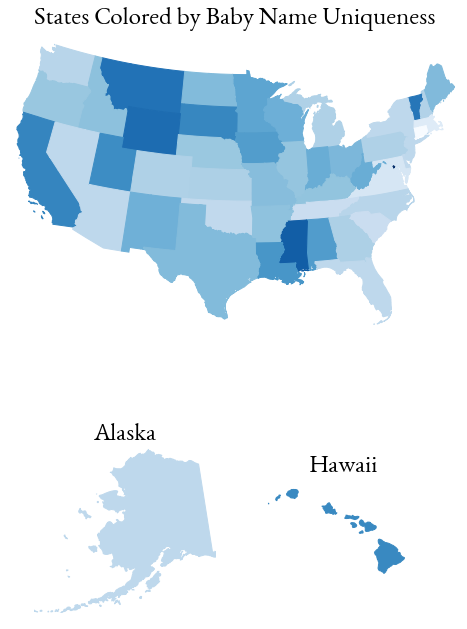

In [73]:
import matplotlib.font_manager as fm
cmap = plt.cm.Blues
vmin = 0; vmax = 1

fig = plt.figure(figsize = (15, 24), dpi=300)
prop = fm.FontProperties(fname='/Users/yarrowmadrona/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/EBGaramond-Regular.ttf')

ax_mainland = plt.subplot2grid((4,4),(0,0), colspan=4)
plt.text(0.5, 1.05, "States Colored by Baby Name Uniqueness",
         horizontalalignment='center',
         fontproperties=prop, fontsize=25,
         transform = ax_mainland.transAxes)
ax_mainland.axis("off")

#map for the lower 48
colors = {}
state_names = []
for shapedict in map_lower_48.states_info:
    state_name = shapedict['NAME']
    if state_name != 'Puerto Rico':
        score = new_dict[state_name]
        colors[state_name] = cmap(np.sqrt(score)) 
        #maps the colors to the states in a dictionary called "colors"
    state_names.append(state_name)

for nshape, seg in enumerate(map_lower_48.states):
    if state_names[nshape] != 'Puerto Rico':
        color = rgb2hex(colors[state_names[nshape]]) 
        mainland_poly = Polygon(seg, facecolor=color, edgecolor=color) 
        ax_mainland.add_patch(mainland_poly)
map_lower_48.drawstates(color=color, linewidth=0)


#Repeat for Alaska
colors = {}
ax_alaska = plt.subplot2grid((4,4), (1,1), colspan = 1)
ax_alaska.set_title('Alaska', fontproperties=prop, fontsize=25)
ax_alaska.axis("off")

for shapedict in m_alaska.states_info:
    score = new_dict['Alaska']
    colors['Alaska'] = cmap(math.sqrt(score))
    state_names.append('Alaska')

for nshape, seg in enumerate(m_alaska.states):
    color_alaska = rgb2hex(colors['Alaska'])
    alaska_poly = Polygon(seg, facecolor=color_alaska, edgecolor=color_alaska)
    ax_alaska.add_patch(alaska_poly)
m_alaska.drawstates(color=color, linewidth=0)

#Repeat for Hawaii
colors = {}
ax_hawaii = plt.subplot2grid((4,4), (1,2), colspan = 1)  
ax_hawaii.set_title('Hawaii', fontproperties=prop, fontsize=25)
ax_hawaii.axis("off")

for shapedict in m_hawaii.states_info:
    score = new_dict['Hawaii']
    colors['Hawaii'] = cmap(math.sqrt(score))
    state_names.append('Hawaii')

for nshape, seg in enumerate(m_hawaii.states):
    color_hawaii = rgb2hex(colors['Hawaii'])
    hawaii_poly = Polygon(seg, facecolor=color_hawaii, edgecolor=color_hawaii)
    ax_hawaii.add_patch(hawaii_poly)
    
m_hawaii.drawstates(color=color_hawaii, linewidth=0)

plt.savefig('state_name_scores.png', dpi=300) #bbox_inces='tight')


Finaly we have our figure. You will need to crop it manually as there will be extra white space below the plots.